🍄 Mushroom Classification using Decision Tree Learning
Project Description

This project focuses on building a Decision Tree classifier to predict whether a mushroom is edible or poisonous using the well-known Mushroom Classification dataset. The goal is to demonstrate how tree-based machine learning methods can be applied to categorical biological data while offering transparency, interpretability, and strong predictive performance.

🌱 About the Dataset

The Mushroom Classification dataset contains various physical and biological characteristics of mushrooms—such as cap shape, cap color, odor, gill size, stalk features, and more.
Each mushroom is labeled as:

Edible (e)

Poisonous (p)

All features are categorical, making the dataset ideal for Decision Tree–based models.

🌳 Why Decision Trees?

Decision Trees are intuitive, easy to interpret, and effective for classification tasks. They are particularly suitable for this dataset because:

They naturally handle categorical features

They require minimal preprocessing

They provide human-readable decision logic

They support feature selection through split criteria

This makes them a powerful baseline model for biological and real-world classification problems.

🧠 Core Concepts Covered

The project includes detailed explanations of the fundamental ideas behind Decision Tree learning:

🔸 Entropy

Measures the level of disorder or impurity in the dataset.

🔸 Information Gain

Indicates how much uncertainty is reduced after performing a split.

🔸 Gini Index

An impurity measure commonly used in CART algorithms to choose optimal splits.

🔸 CART (Classification and Regression Trees)

A framework for generating binary decision trees for classification tasks.

🔸 Pruning Techniques

Used to reduce overfitting and improve model generalization.

⚙️ Modeling Workflow

The project follows a complete machine learning pipeline:

Data exploration & preprocessing

Encoding categorical features

Training the Decision Tree classifier

Evaluating model accuracy and performance

Visualizing the decision tree structure

Interpreting key features that influence classification

📈 Results

The Decision Tree model effectively predicts mushroom edibility and identifies the most informative features (such as odor, spore print color, and gill size).
These results highlight the strength of tree-based methods for categorical biological datasets.

🎯 Project Goals

Understand Decision Tree theory and impurity metrics

Apply tree-based classification to real biological data

Interpret decision rules and feature importance

Build an explainable model for edible vs. poisonous mushroom prediction.

📊 Decision Tree Workflow Diagram (ASCII)


                          ┌───────────────────────────┐
                          │      Dataset Loaded       │
                          │  (Mushroom Attributes)    │
                          └──────────────┬────────────┘
                                         │
                                         ▼
                          ┌───────────────────────────┐
                          │   Data Preprocessing       │
                          │ - Encode Categorical Data  │
                          │ - Handle Missing Values    │
                          └──────────────┬────────────┘
                                         │
                                         ▼
                          ┌───────────────────────────┐
                          │   Train/Test Split         │
                          │ (e.g., 80% / 20%)          │
                          └──────────────┬────────────┘
                                         │
                                         ▼
                      ┌───────────────────────────────────────┐
                      │      Decision Tree Training           │
                      │ - Choose best feature for split       │
                      │ - Compute Entropy / Gini              │
                      │ - Maximize Information Gain           │
                      └──────────────┬────────────────────────┘
                                     │
                                     ▼
                  ┌─────────────────────────────────────────────────┐
                  │            Tree Construction                     │
                  │ - Recursive splitting                           │
                  │ - Internal nodes = feature tests                │
                  │ - Branches = decision outcomes                  │
                  │ - Leaves = edible / poisonous prediction        │
                  └──────────────────────┬──────────────────────────┘
                                         │
                                         ▼
                            ┌────────────────────────┐
                            │        Pruning         │
                            │ - Reduce overfitting   │
                            │ - Simplify tree        │
                            └───────────┬────────────┘
                                        │
                                        ▼
                          ┌────────────────────────────┐
                          │      Model Evaluation       │
                          │ - Accuracy Score            │
                          │ - Confusion Matrix          │
                          │ - Feature Importance        │
                          └──────────────┬─────────────┘
                                         │
                                         ▼
                     ┌────────────────────────────────────────┐
                     │          Final Prediction               │
                     │   "Edible"  or  "Poisonous"            │
                     └────────────────────────────────────────┘


In [21]:
#import necessary libraries
# Importing libraries matplotlib and seabor for data-visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn  as sns

In [22]:
#Importing dataset from my github

URI = "https://raw.githubusercontent.com/tedolight/Mushroom-Classification/main/mushrooms.csv"
df = pd.read_csv(URI)


In [24]:
# To see the first five rows
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [25]:
# To see the last five rows
df.tail()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l
8123,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,o,c,l


In [27]:
# calculates the total number of missing values in your entire dataset.
df.isnull().sum().sum()

np.int64(0)

In [29]:
# The class column is target and it has two clasification which describes if mushroom is poisonous or edible
df['class'].unique()

array(['p', 'e'], dtype=object)

In [30]:
# To see if there is any null values in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [32]:
#To find number of rows and column
df.shape

(8124, 23)

<Axes: xlabel='class', ylabel='Count'>

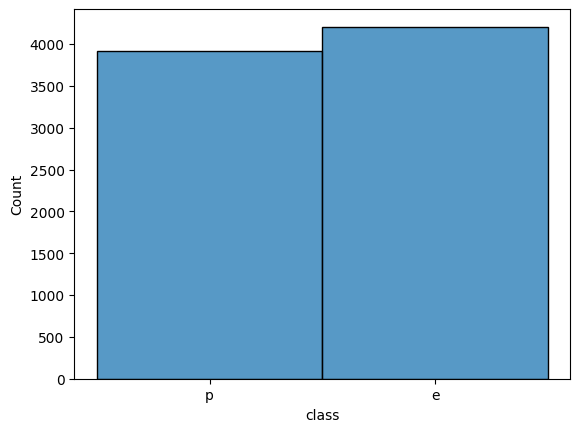

In [34]:
# To visualize the distribution of the target variable (class)
sns.histplot(df['class'])

In [35]:
# Separating Features and Target
X = df.drop(['class'],axis=1)
y = df['class']

In [36]:
X = pd.get_dummies(X)
X.head()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,False,False,False,False,False,True,False,False,True,False,...,True,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
2,True,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,True,False,False,False,True,...,True,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False


In [38]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y = encoder.fit_transform(y)
print(y)

# For y variable encoding is done as Poisonous = p -> 1 Edible = e -> 0

[1 0 0 ... 0 1 0]


In [39]:
# Splitting Dataset to training and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [40]:
X_train.shape , X_test.shape

((6499, 117), (1625, 117))

In [41]:
y_train.shape , y_test.shape

((6499,), (1625,))

In [42]:
#  Decision Tree Creation
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [43]:
from sklearn.metrics import accuracy_score

In [44]:
# Creation of Decision Tree using Gini Index
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
# fit the model
model_gini.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=3, random_state=0)

[Text(0.5769230769230769, 0.875, 'x[27] <= 0.5\ngini = 0.499\nsamples = 6499\nvalue = [3388.0, 3111.0]'),
 Text(0.3076923076923077, 0.625, 'x[53] <= 0.5\ngini = 0.288\nsamples = 3660\nvalue = [637, 3023]'),
 Text(0.4423076923076923, 0.75, 'True  '),
 Text(0.15384615384615385, 0.375, 'x[55] <= 0.5\ngini = 0.135\nsamples = 3229\nvalue = [236, 2993]'),
 Text(0.07692307692307693, 0.125, 'gini = 0.055\nsamples = 3080\nvalue = [87, 2993]'),
 Text(0.23076923076923078, 0.125, 'gini = 0.0\nsamples = 149\nvalue = [149, 0]'),
 Text(0.46153846153846156, 0.375, 'x[94] <= 0.5\ngini = 0.13\nsamples = 431\nvalue = [401, 30]'),
 Text(0.38461538461538464, 0.125, 'gini = 0.0\nsamples = 30\nvalue = [0, 30]'),
 Text(0.5384615384615384, 0.125, 'gini = 0.0\nsamples = 401\nvalue = [401, 0]'),
 Text(0.8461538461538461, 0.625, 'x[100] <= 0.5\ngini = 0.06\nsamples = 2839\nvalue = [2751, 88]'),
 Text(0.7115384615384615, 0.75, '  False'),
 Text(0.7692307692307693, 0.375, 'x[63] <= 0.5\ngini = 0.023\nsamples = 2784

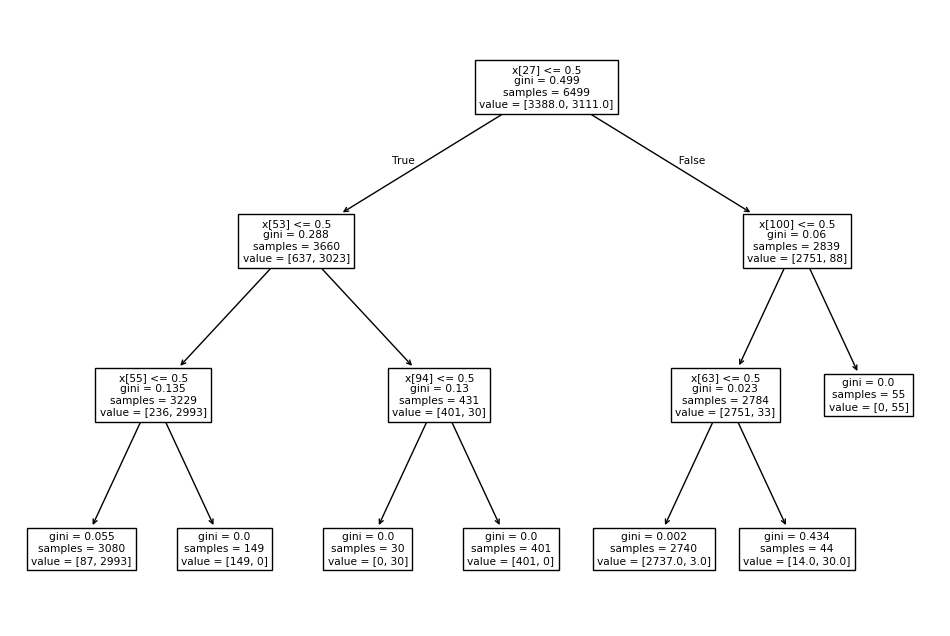

In [46]:
#Plot the tree
plt.figure(figsize=(12,8))
tree.plot_tree(model_gini.fit(X_train, y_train))






In [48]:
#Predict the values
y_pred_gini = model_gini.predict(X_test)

In [49]:
#Predict the value using X train for accuracy comparision
y_pred_train_gini = model_gini.predict(X_train)

y_pred_train_gini

array([0, 0, 1, ..., 1, 1, 1])

In [50]:
# Determine the accuracy score
print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))
#Accuracy Score for training set
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Model accuracy score with criterion gini index: 0.9902
Training-set accuracy score: 0.9840


In [51]:
# Creation of Decision Tree using with entropy
model_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
# fit the model
model_entropy.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

[Text(0.5555555555555556, 0.875, 'x[27] <= 0.5\nentropy = 0.999\nsamples = 6499\nvalue = [3388.0, 3111.0]'),
 Text(0.3333333333333333, 0.625, 'x[20] <= 0.5\nentropy = 0.667\nsamples = 3660\nvalue = [637, 3023]'),
 Text(0.4444444444444444, 0.75, 'True  '),
 Text(0.2222222222222222, 0.375, 'x[53] <= 0.5\nentropy = 0.976\nsamples = 1077\nvalue = [637, 440]'),
 Text(0.1111111111111111, 0.125, 'entropy = 0.933\nsamples = 676\nvalue = [236, 440]'),
 Text(0.3333333333333333, 0.125, 'entropy = 0.0\nsamples = 401\nvalue = [401, 0]'),
 Text(0.4444444444444444, 0.375, 'entropy = 0.0\nsamples = 2583\nvalue = [0, 2583]'),
 Text(0.7777777777777778, 0.625, 'x[100] <= 0.5\nentropy = 0.199\nsamples = 2839\nvalue = [2751, 88]'),
 Text(0.6666666666666667, 0.75, '  False'),
 Text(0.6666666666666666, 0.375, 'x[63] <= 0.5\nentropy = 0.093\nsamples = 2784\nvalue = [2751, 33]'),
 Text(0.5555555555555556, 0.125, 'entropy = 0.012\nsamples = 2740\nvalue = [2737.0, 3.0]'),
 Text(0.7777777777777778, 0.125, 'entrop

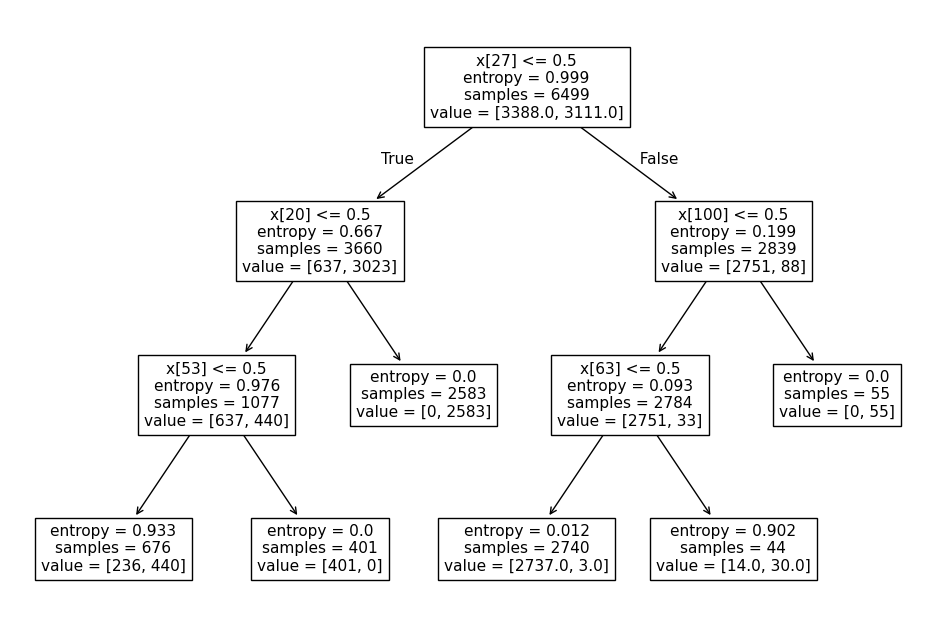

In [53]:
plt.figure(figsize=(12,8))
tree.plot_tree(model_entropy.fit(X_train, y_train))

In [55]:
#Predict the values
y_pred_entropy = model_entropy.predict(X_test)

In [57]:
#Predict the value using X train for accuracy comparision
y_pred_train_entropy = model_entropy.predict(X_train)


In [58]:
print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_entropy)))
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_entropy)))

Model accuracy score with criterion entropy: 0.9637
Training-set accuracy score: 0.9611


In [60]:
print('Training set score: {:.4f}'.format(model_entropy.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(model_entropy.score(X_test, y_test)))

Training set score: 0.9611
Test set score: 0.9637


In [61]:
#  Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import  f1_score

In [62]:
cm = confusion_matrix(y_test, y_pred_entropy)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[766  54]
 [  5 800]]


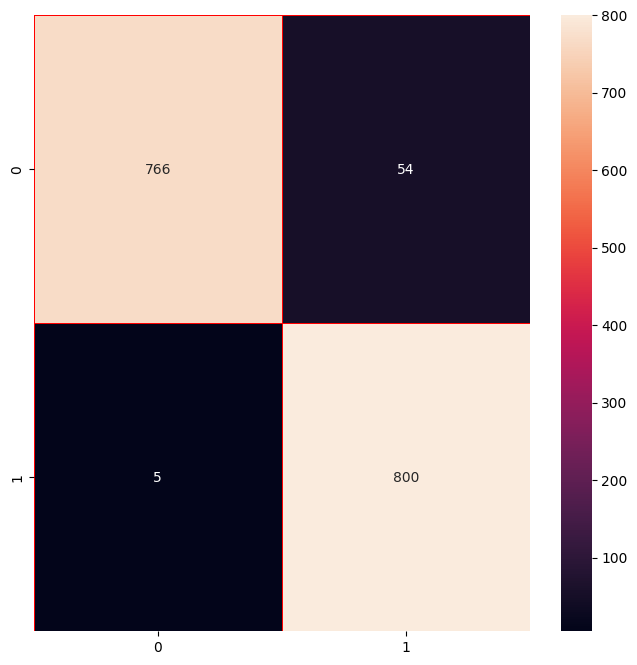

<Figure size 640x480 with 0 Axes>

In [66]:
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(cm, annot=True, linewidths=0.5,linecolor="red", fmt= '.0f',ax=ax)
plt.show()
plt.savefig('ConfusionMatrix.png')

In [67]:
print(classification_report(y_test, y_pred_entropy))

              precision    recall  f1-score   support

           0       0.99      0.93      0.96       820
           1       0.94      0.99      0.96       805

    accuracy                           0.96      1625
   macro avg       0.97      0.96      0.96      1625
weighted avg       0.97      0.96      0.96      1625



In [69]:
f1_score = f1_score(y_test, y_pred_entropy)
print("F1 Score:",f1_score)

F1 Score: 0.9644364074743822


 Conclusion: Decision-Tree Classifier model using both gini index and entropy have only very very small difference in model accuracy and training set accuracy, so there is no sign of overfitting.